In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define paths
data_file_path = 'v32_Dome-Recommendations-With_Provenance_Verified.tsv'
output_dir = 'Annotation_Graphs'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Set plot style
sns.set_theme(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv(data_file_path, sep='\t')

# Display basic info and first few rows
print(df.info())
display(df.head())

# Columns of interest
cols_of_interest = ['provenance_source', 'annotation_matches_publication_metadata', 'annotation_matches_shortid']
display(df[cols_of_interest].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   _id/$oid                                 270 non-null    object 
 1   dataset/availability                     266 non-null    object 
 2   dataset/provenance                       270 non-null    object 
 3   dataset/redundancy                       242 non-null    object 
 4   dataset/splits                           257 non-null    object 
 5   dataset/done                             127 non-null    float64
 6   dataset/skip                             127 non-null    float64
 7   evaluation/availability                  245 non-null    object 
 8   evaluation/comparison                    251 non-null    object 
 9   evaluation/confidence                    232 non-null    object 
 10  evaluation/measure                       263 non-n

,_id/$oid,dataset/availability,dataset/provenance,dataset/redundancy,dataset/splits,dataset/done,dataset/skip,evaluation/availability,evaluation/comparison,evaluation/confidence,...,updated/$date,uuid,reviewState,shortid,update,__v,score,provenance_source,annotation_matches_publication_metadata,annotation_matches_shortid
0,63516fedb9c880af1f305b5f,?,distinguish 32 patients from 30 healthy control,Independance,distinguish 32 patients from 30 healthy control,4.0,0.0,No,No,No,...,2026-02-02T19:46:52.000Z,55301cf1-e2b8-4e59-86d5-6502872104d6,undefined,ftglxzast4,NaN,NaN,NaN,DOME_JSON,No Match,Match
1,63516fedb9c880af1f305b5b,Yes. https://www.ncbi.nlm.nih.gov/geo/query/ac...,The data set is publicly available\nand descri...,Αll age classes appeared almost equally in bot...,training (n = 75) and validation(n = 66),4.0,0.0,No,comparison of the outcome of seagull to that o...,the results of seagull and SGL were very simil...,...,2026-02-02T19:46:52.000Z,d8f4a424-12a1-40cc-8bde-3f756df2316b,undefined,v4efeulceq,NaN,NaN,NaN,DOME_JSON,No Match,Match
2,63516fedb9c880af1f305b60,"Yes, Supporting information.",Neonatal Intensive Care Unit (NICU) at the Chi...,not reported (there were pre-selection criteri...,"618 infants with 1188 sepsis evaluations, 110 ...",4.0,0.0,"Yes, Supporting information, https://github.co...","Ada boost, Gradient Boosting, kNN, Logistic Re...",NA (The null hypothesis of equal inter-model d...,...,2026-02-02T19:46:52.000Z,92789330-e8c7-4761-a47b-6758bb151af7,undefined,m8bml54z62,NaN,NaN,NaN,DOME_JSON,No Match,Match
3,63516fedb9c880af1f305b2e,yes: https://www.olink.com/application/mgh-cov...,clinical and normalized protein expression pro...,Not commented,only LOOCV was used,4.0,0.0,Confusion matrices in the supplement: http://1...,"None, only the 44 different models used in the...",No,...,2026-02-02T19:46:52.000Z,9f2653e6-d8fb-455a-ac07-31ffd86fbf52,undefined,1de6o2bxxv,NaN,NaN,NaN,DOME_JSON,No Match,Match
4,63a25db2e8edf6ce46f6e84b,"Yes, The MSI data have been deposited to the P...",DESI-MSI experiments of whole mouse kidney and...,Not applicable,Not applicable,4.0,0.0,No,"Yes, our method was compared with two internal...",not applicable,...,2026-02-02T19:46:52.000Z,8c0c94cd-3172-4f65-92b0-b997742324e0,undefined,ck60ijuxvo,NaN,NaN,NaN,DOME_JSON,Match,Match


,provenance_source,annotation_matches_publication_metadata,annotation_matches_shortid
0,DOME_JSON,No Match,Match
1,DOME_JSON,No Match,Match
2,DOME_JSON,No Match,Match
3,DOME_JSON,No Match,Match
4,DOME_JSON,Match,Match


In [17]:
# Check unique values
print("Provenance Source unique values:", df['provenance_source'].unique())
print("Metadata Match unique values:", df['annotation_matches_publication_metadata'].unique())
print("ShortID Match unique values:", df['annotation_matches_shortid'].unique())

Provenance Source unique values: ['DOME_JSON' 'Starting_TSV']
Metadata Match unique values: ['No Match' 'Match' 'Unsure']
ShortID Match unique values: ['Match' 'No Match' 'Unsure']


Saved graph to Annotation_Graphs/publication_metadata_match_vs_provenance.png


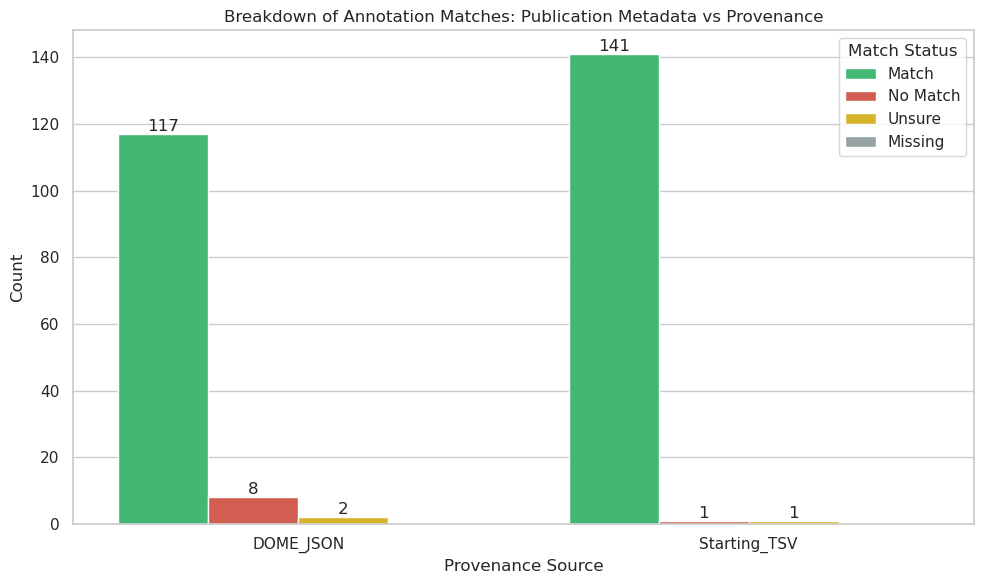

Saved graph to Annotation_Graphs/shortid_match_vs_provenance.png


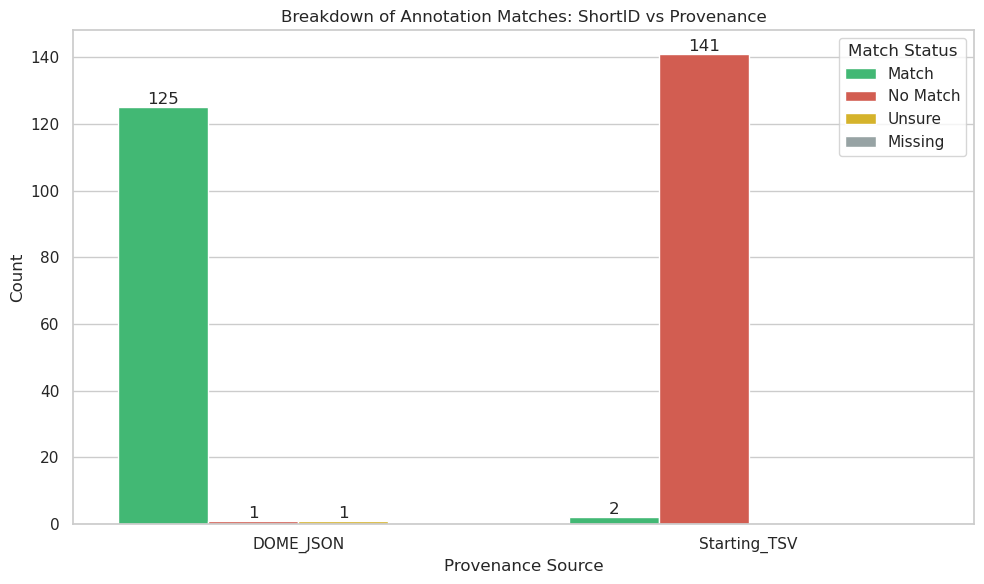

In [18]:
# Handle NaNs for plotting
df_clean = df.copy()
df_clean['annotation_matches_publication_metadata'] = df_clean['annotation_matches_publication_metadata'].fillna('Missing')
df_clean['annotation_matches_shortid'] = df_clean['annotation_matches_shortid'].fillna('Missing')

# Define consistent color palette
match_palette = {
    'Match': '#2ecc71',      # Green
    'No Match': '#e74c3c',   # Red
    'Unsure': '#f1c40f',     # Yellow/Orange
    'Missing': '#95a5a6'     # Gray
}

# Define consistent hue order to ensure legend and bars are always in the same order
hue_order = ['Match', 'No Match', 'Unsure', 'Missing']

# Function to create and save plot
def plot_breakdown(column, title, filename):
    plt.figure(figsize=(10, 6))
    
    # Calculate counts for annotations
    ax = sns.countplot(data=df_clean, x='provenance_source', hue=column, palette=match_palette, hue_order=hue_order)
    
    plt.title(title)
    plt.xlabel('Provenance Source')
    plt.ylabel('Count')
    plt.legend(title='Match Status')
    
    # Add value labels
    for container in ax.containers:
        ax.bar_label(container)
        
    plt.tight_layout()
    save_path = os.path.join(output_dir, filename)
    plt.savefig(save_path)
    print(f"Saved graph to {save_path}")
    plt.show()

# Generate Graph 1: Publication Metadata Match
plot_breakdown(
    'annotation_matches_publication_metadata', 
    'Breakdown of Annotation Matches: Publication Metadata vs Provenance', 
    'publication_metadata_match_vs_provenance.png'
)

# Generate Graph 2: ShortID Match
plot_breakdown(
    'annotation_matches_shortid', 
    'Breakdown of Annotation Matches: ShortID vs Provenance', 
    'shortid_match_vs_provenance.png'
)

Saved combined graph to Annotation_Graphs/combined_annotation_matches_vs_provenance.png


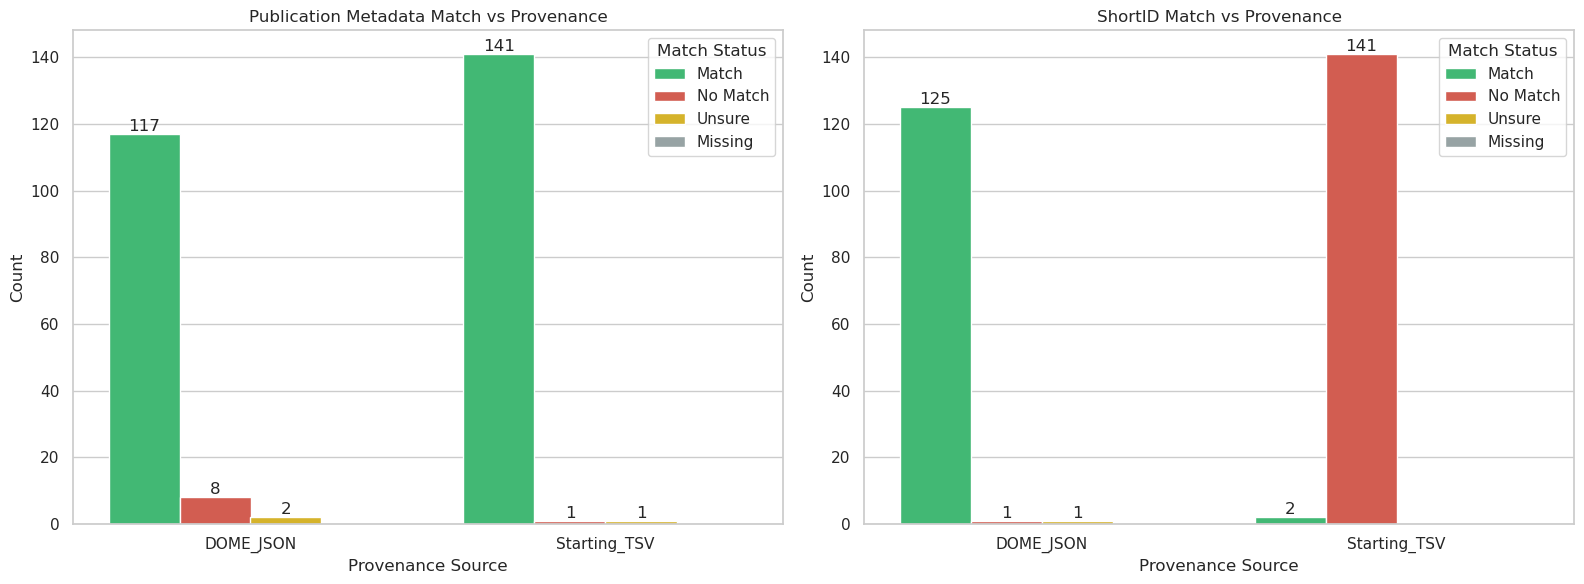

In [19]:
# Create a combined figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Publication Metadata Match
sns.countplot(
    data=df_clean, 
    x='provenance_source', 
    hue='annotation_matches_publication_metadata', 
    ax=axes[0], 
    palette=match_palette,
    hue_order=hue_order
)
axes[0].set_title('Publication Metadata Match vs Provenance')
axes[0].set_xlabel('Provenance Source')
axes[0].set_ylabel('Count')
axes[0].legend(title='Match Status')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Plot 2: ShortID Match
sns.countplot(
    data=df_clean, 
    x='provenance_source', 
    hue='annotation_matches_shortid', 
    ax=axes[1], 
    palette=match_palette,
    hue_order=hue_order
)
axes[1].set_title('ShortID Match vs Provenance')
axes[1].set_xlabel('Provenance Source')
axes[1].set_ylabel('Count')
axes[1].legend(title='Match Status')
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
save_path_combined = os.path.join(output_dir, 'combined_annotation_matches_vs_provenance.png')
plt.savefig(save_path_combined)
print(f"Saved combined graph to {save_path_combined}")
plt.show()

In [3]:
# Create v33 by Removing 'Unsure' and 'No Match' rows
# Filter condition: Keep rows where 'annotation_matches_publication_metadata' is NOT 'Unsure' AND NOT 'No Match'
df_v33 = df[~df['annotation_matches_publication_metadata'].isin(['Unsure', 'No Match'])].copy()

# Print counts
print(f"Original row count: {len(df)}")
print(f"New row count (v33): {len(df_v33)}")
print(f"Rows removed: {len(df) - len(df_v33)}")

# Save to new TSV file
v33_filename = 'v33_Dome-Recommendations-With_Provenance_Verified.tsv'
df_v33.to_csv(v33_filename, sep='\t', index=False)
print(f"Saved v33 file to {v33_filename}")

Original row count: 270
New row count (v33): 258
Rows removed: 12
Saved v33 file to v33_Dome-Recommendations-With_Provenance_Verified.tsv


Starting comparison analysis using v34_Dome-Recommendations-With_Provenance_Verified.tsv...
Loaded V34 TSV. Unique shortids: 258
Loaded JSON. Total public entries: 281
Unique public shortids in JSON: 281

Comparison Results:
Matches (in both): 258
Missing in V34 (present in Public JSON): 23
Extra in V34 (not in Public JSON): 0
Saved missing entries TSV to analysis_v34_vs_json_missing_entries.tsv
Saved missing entries JSON to analysis_v34_vs_json_missing_entries.json
No extra entries found in V34 (all V34 entries exist in JSON).
Saved comparison graph to analysis_v34_vs_json_overlap.png


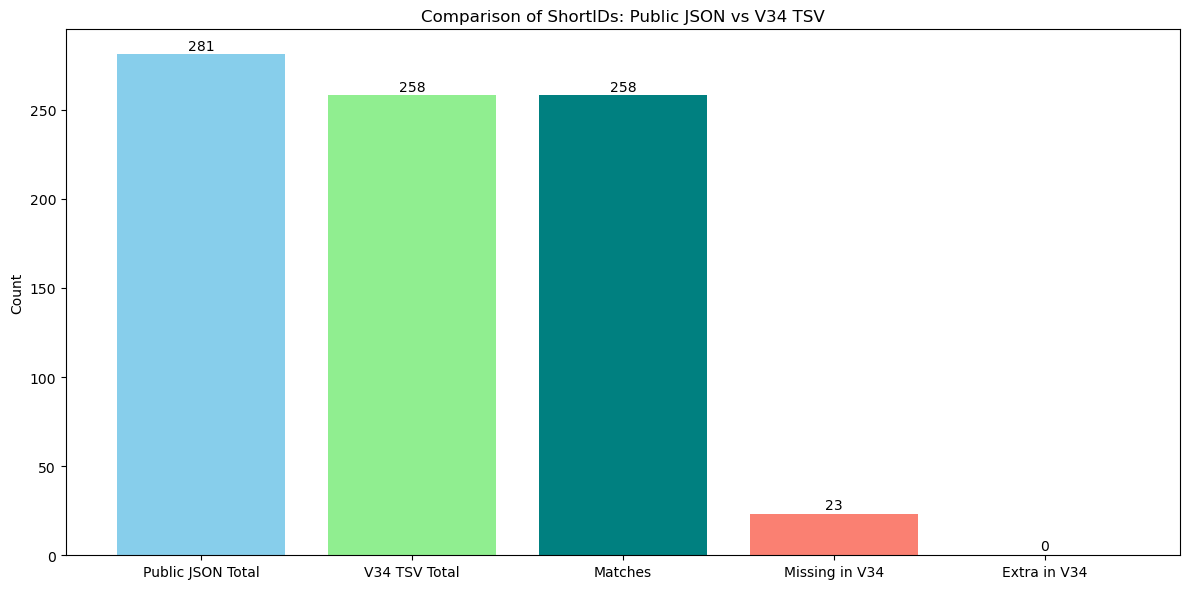

In [20]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Paths
# Updated to use v34
v34_tsv_path = 'v34_Dome-Recommendations-With_Provenance_Verified.tsv'
json_source_path = 'dome_review_raw_human_20260204.json'

# Output Paths
missing_tsv_path = 'analysis_v34_vs_json_missing_entries.tsv'
missing_json_path = 'analysis_v34_vs_json_missing_entries.json'
extra_tsv_path = 'analysis_v34_extra_entries.tsv'
chart_path = 'analysis_v34_vs_json_overlap.png'

print(f"Starting comparison analysis using {v34_tsv_path}...")

# 1. Load V34 TSV
df_v34 = pd.read_csv(v34_tsv_path, sep='\t')
# Ensure shortid is string
df_v34['shortid'] = df_v34['shortid'].astype(str).str.strip()
v34_ids = set(df_v34['shortid'].dropna().unique())
print(f"Loaded V34 TSV. Unique shortids: {len(v34_ids)}")

# 2. Load JSON and Filter Public
with open(json_source_path, 'r') as f:
    json_data = json.load(f)

public_json_entries = [entry for entry in json_data if entry.get('public') == True]
print(f"Loaded JSON. Total public entries: {len(public_json_entries)}")

# Create lookup for public json entries by shortid
json_dict = {}
json_ids = set()

for entry in public_json_entries:
    sid = str(entry.get('shortid', '')).strip()
    if sid:
        json_dict[sid] = entry
        json_ids.add(sid)

print(f"Unique public shortids in JSON: {len(json_ids)}")

# 3. Compare
# Find entries in JSON but NOT in V34
missing_ids = json_ids - v34_ids
# Find entries in V34 but NOT in JSON
extra_ids = v34_ids - json_ids
common_ids = json_ids.intersection(v34_ids)

print(f"\nComparison Results:")
print(f"Matches (in both): {len(common_ids)}")
print(f"Missing in V34 (present in Public JSON): {len(missing_ids)}")
print(f"Extra in V34 (not in Public JSON): {len(extra_ids)}")

# 4. Generate Outputs for Missing Entries (In JSON, not V34)

# TSV Report
missing_tsv_data = []
# JSON Dump
missing_json_objects = []

for sid in missing_ids:
    entry = json_dict[sid]
    missing_json_objects.append(entry)
    
    # Extract details for TSV
    pub_info = entry.get('publication', {})
    missing_tsv_data.append({
        'shortid': sid,
        'title': pub_info.get('title', ''),
        'pmid': pub_info.get('pmid', ''),
        'authors': pub_info.get('authors', ''),
        'journal': pub_info.get('journal', ''),
        'year': pub_info.get('year', ''),
        'doi': pub_info.get('doi', '')
    })

# Save Missing TSV
if missing_tsv_data:
    df_missing = pd.DataFrame(missing_tsv_data)
    df_missing.to_csv(missing_tsv_path, sep='\t', index=False)
    print(f"Saved missing entries TSV to {missing_tsv_path}")
else:
    print("No missing entries to save to TSV.")

# Save Missing JSON
if missing_json_objects:
    with open(missing_json_path, 'w') as f:
        json.dump(missing_json_objects, f, indent=4)
    print(f"Saved missing entries JSON to {missing_json_path}")
else:
    print("No missing entries to save to JSON.")

# 5. Generate Outputs for Extra Entries (In V34, not JSON)
if extra_ids:
    extra_data = df_v34[df_v34['shortid'].isin(extra_ids)].copy()
    # Select relevant columns for readability if they exist
    cols_to_keep = ['shortid', 'publication/title', 'publication/pmid', 'publication/year', 'publication/doi']
    # Filter columns that actually exist
    cols_to_keep = [c for c in cols_to_keep if c in extra_data.columns]
    
    if cols_to_keep:
        extra_data_export = extra_data[cols_to_keep]
    else:
        extra_data_export = extra_data
        
    extra_data_export.to_csv(extra_tsv_path, sep='\t', index=False)
    print(f"Saved extra entries TSV (in V34 but not JSON) to {extra_tsv_path}")
else:
    print("No extra entries found in V34 (all V34 entries exist in JSON).")

# 6. Graph Results
labels = ['Public JSON Total', 'V34 TSV Total', 'Matches', 'Missing in V34', 'Extra in V34']
counts = [len(json_ids), len(v34_ids), len(common_ids), len(missing_ids), len(extra_ids)]

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color=['skyblue', 'lightgreen', 'teal', 'salmon', 'orange'])
plt.title('Comparison of ShortIDs: Public JSON vs V34 TSV')
plt.ylabel('Count')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.tight_layout()
plt.savefig(chart_path)
print(f"Saved comparison graph to {chart_path}")
plt.show() # Display in notebook


In [7]:
# Check for duplicate PMIDs in V33 TSV
print("Checking for duplicate PMIDs in V33...")

# Reload to ensure fresh state or use existing df_v33
if 'df_v33' not in locals():
    df_v33 = pd.read_csv(v33_tsv_path, sep='\t')

# 1. Clean PMID column
# PMIDs can be NaN (empty) or floats. We only care about actual PMIDs.
pmid_col = 'publication/pmid'

if pmid_col in df_v33.columns:
    # Filter out NaNs/Empty
    df_pmid = df_v33.dropna(subset=[pmid_col]).copy()
    
    # 2. Find duplicates
    # keep=False marks all duplicates as True (so we see all instances involved in duplication)
    duplicates = df_pmid[df_pmid.duplicated(subset=[pmid_col], keep=False)]

    num_duplicates = len(duplicates)
    num_unique_duplicates = duplicates[pmid_col].nunique()

    print(f"Total rows with valid PMIDs: {len(df_pmid)}")
    print(f"Total rows involved in duplication: {num_duplicates}")
    print(f"Number of unique PMIDs that are duplicated: {num_unique_duplicates}")

    if num_duplicates > 0:
        print("\nList of Duplicated Entries:")
        # Sort by PMID to see them together
        duplicates_sorted = duplicates.sort_values(by=pmid_col)
        
        # Select columns to display
        display_cols = ['shortid', pmid_col, 'publication/title', 'dataset/provenance']
        # Filter for existing columns
        display_cols = [c for c in display_cols if c in duplicates_sorted.columns]
        
        display(duplicates_sorted[display_cols])
        
        # Save to TSV
        dup_out_path = 'analysis_v33_pmid_duplicates.tsv'
        duplicates_sorted.to_csv(dup_out_path, sep='\t', index=False)
        print(f"\nSaved duplicates list to {dup_out_path}")
    else:
        print("\nNo duplicate PMIDs found.")
else:
    print(f"Column '{pmid_col}' not found in dataframe.")


Checking for duplicate PMIDs in V33...
Total rows with valid PMIDs: 253
Total rows involved in duplication: 0
Number of unique PMIDs that are duplicated: 0

No duplicate PMIDs found.


In [9]:
# DEBUG: Investigate Discrepancy (Total Rows vs Unique ShortIDs)
print("--- Investigating Discrepancy ---")

# Reload V33
df_v33_debug = pd.read_csv(v33_tsv_path, sep='\t')
total_rows = len(df_v33_debug)
print(f"Total rows in TSV file: {total_rows}")

# Check ShortID column specifically
shortid_col = df_v33_debug['shortid']

# 1. Check for NaNs
null_shortids = df_v33_debug[shortid_col.isna()]
print(f"Rows with NaN shortid: {len(null_shortids)}")

# 2. Check for empty strings or whitespace only
# Convert to string first to be safe, but keep original for NaN check
shortid_str = shortid_col.astype(str).str.strip()
# 'nan' string comes from NaN conversion if not handled
empty_shortids = df_v33_debug[(shortid_str == '') | (shortid_str.str.lower() == 'nan')]
print(f"Rows with empty or 'nan' shortid string: {len(empty_shortids)}")

# 3. Check for Duplicates
valid_shortids_df = df_v33_debug[~df_v33_debug.index.isin(empty_shortids.index)]
duplicates_shortid = valid_shortids_df[valid_shortids_df.duplicated(subset=['shortid'], keep=False)]
print(f"Rows with duplicated valid shortids: {len(duplicates_shortid)}")

# 4. Show the problematic rows
problem_rows = pd.concat([null_shortids, empty_shortids, duplicates_shortid]).drop_duplicates()

if not problem_rows.empty:
    print("\nProblematic Rows (Missing or Duplicate ShortIDs):")
    cols = ['shortid', 'publication/title', 'publication/pmid', 'dataset/provenance'] 
    # Filter valid cols
    cols = [c for c in cols if c in problem_rows.columns]
    display(problem_rows[cols])
    
    # Save report
    problem_out = 'analysis_v33_shortid_issues.tsv'
    problem_rows.to_csv(problem_out, sep='\t', index=False)
    print(f"Saved problematic rows to {problem_out}")
else:
    print("\nNo obvious shortid issues found via standard checks.")

# 5. Re-verify the unique count logic
unique_ids = set(shortid_str)
# Remove 'nan' if present from set
unique_ids.discard('nan')
unique_ids.discard('')
print(f"Calculated valid unique shortids: {len(unique_ids)}")
print(f"Discrepancy: {total_rows} (Total) - {len(unique_ids)} (Unique Valid) = {total_rows - len(unique_ids)}")


--- Investigating Discrepancy ---
Total rows in TSV file: 258
Rows with NaN shortid: 0
Rows with empty or 'nan' shortid string: 0
Rows with duplicated valid shortids: 8

Problematic Rows (Missing or Duplicate ShortIDs):


,shortid,publication/title,publication/pmid,dataset/provenance
0,ck60ijuxvo,Delineating regions of interest for mass spect...,37039115.0,DESI-MSI experiments of whole mouse kidney and...
68,t7m3dsf9ni,Identification of Gene Signatures and Expressi...,33584803.0,The datasets were obtained from the study of P...
120,t7m3dsf9ni,Differential Urinary Proteome Analysis for Pre...,32545899.0,Proteomes of urine samples from 54 T2D (Type 2...
121,ck60ijuxvo,Single-cell ATAC-seq signal extraction and enh...,32620137.0,Provenance stated via references
134,ck60ijuxvo,Linking the epigenome to the genome: correlati...,22558141.0,"NAME21 consortium, ENCODE consortium, whole-g..."
136,ck60ijuxvo,Development of a prediction model for hypotens...,32298292.0,made their own dataset
172,ck60ijuxvo,Circulating Neutrophil Extracellular Traps Sig...,33240258.0,they created the dataset
194,ck60ijuxvo,Prediction of plant lncRNA by ensemble machine...,29720103.0,"positive: lncRNAdb v2.0, lncRNAdisease , total..."


Saved problematic rows to analysis_v33_shortid_issues.tsv
Calculated valid unique shortids: 252
Discrepancy: 258 (Total) - 252 (Unique Valid) = 6


In [10]:
# Content-based Matching for Duplicate ShortIDs
import json
import pandas as pd

print("--- Content-based Identification for Mislabeled Rows ---")

# 1. Load Data
json_path = 'dome_review_raw_human_20260204.json'
# Assuming df_v33_debug is still available from previous cell, otherwise reload
if 'df_v33_debug' not in locals():
    df_v33_debug = pd.read_csv('v33_Dome-Recommendations-With_Provenance_Verified.tsv', sep='\t')

with open(json_path, 'r') as f:
    json_data = json.load(f)

# 2. Identify Problem Rows
# We specifically target the ids found in the discrepancy analysis: ck60ijuxvo, t7m3dsf9ni
target_shortids = ['ck60ijuxvo', 't7m3dsf9ni']
problem_rows = df_v33_debug[df_v33_debug['shortid'].isin(target_shortids)].copy()

print(f"Analyzing {len(problem_rows)} rows with duplicate shortIDs: {target_shortids}")

# 3. Define Fields for Content Matching (TSV col -> JSON keys)
# Selecting fields likely to be unique and long text
comparison_fields = {
    'dataset/provenance': ('dataset', 'provenance'),
    'dataset/availability': ('dataset', 'availability'),
    'optimization/encoding': ('optimization', 'encoding'),
    'optimization/features': ('optimization', 'features'),
    'dataset/splits': ('dataset', 'splits')
}

# 4. Search Loop
for idx, row in problem_rows.iterrows():
    curr_shortid = row['shortid']
    curr_title = str(row.get('publication/title', ''))
    
    print(f"\n[Row {idx}] Current Label: {curr_shortid}")
    print(f"  TSV Title: {curr_title}")
    
    best_matches = []
    
    for entry in json_data:
        # Check content overlap
        match_count = 0
        matched_fields_list = []
        
        for tsv_col, (cat, key) in comparison_fields.items():
            tsv_val = str(row.get(tsv_col, '')).strip()
            # Skip empty/nan
            if not tsv_val or tsv_val.lower() == 'nan': continue
            
            # Get JSON val
            json_val = str(entry.get(cat, {}).get(key, '')).strip()
            
            if not json_val: continue
            
            # Exact match check
            if tsv_val == json_val:
                match_count += 1
                matched_fields_list.append(key)
        
        if match_count > 0:
            best_matches.append({
                'json_shortid': entry.get('shortid'),
                'score': match_count,
                'matched_keys': matched_fields_list,
                'json_title': entry.get('publication', {}).get('title', '')
            })
    
    # Sort matches by score
    best_matches.sort(key=lambda x: x['score'], reverse=True)
    
    if best_matches:
        top = best_matches[0]
        # Only print if it's a strong match or different ID
        print(f"  -> Found Matched Content in JSON Entry: {top['json_shortid']}")
        print(f"     Match Score: {top['score']} fields: {top['matched_keys']}")
        print(f"     JSON Title: {top['json_title']}")
        
        if top['json_shortid'] != curr_shortid:
            print(f"     *** MISMATCH DETECTED: TSV ID {curr_shortid} vs CONTENT ID {top['json_shortid']} ***")
        else:
             print(f"     (Confirmed: Content matches the labeled shortID)")
             
        # If there are competing matches, show them
        if len(best_matches) > 1 and best_matches[1]['score'] == top['score']:
            print(f"     ! Warning: Multiple entries with same score. Next: {best_matches[1]['json_shortid']}")
    else:
        print("  -> No content matches found in JSON.")


--- Content-based Identification for Mislabeled Rows ---
Analyzing 8 rows with duplicate shortIDs: ['ck60ijuxvo', 't7m3dsf9ni']

[Row 0] Current Label: ck60ijuxvo
  TSV Title: Delineating regions of interest for mass spectrometry imaging by multimodally corroborated spatial segmentation.
  -> Found Matched Content in JSON Entry: ck60ijuxvo
     Match Score: 5 fields: ['provenance', 'availability', 'encoding', 'features', 'splits']
     JSON Title: Delineating Regions-of-interest for Mass Spectrometry Imaging by Multimodally Corroborated Spatial Segmentation
     (Confirmed: Content matches the labeled shortID)

[Row 68] Current Label: t7m3dsf9ni
  TSV Title: Identification of Gene Signatures and Expression Patterns During Epithelial-to-Mesenchymal Transition From Single-Cell Expression Atlas.
  -> Found Matched Content in JSON Entry: t7m3dsf9ni
     Match Score: 5 fields: ['provenance', 'availability', 'encoding', 'features', 'splits']
     JSON Title: Identification of Gene Signatures

In [13]:
# Create V34 with corrected ShortIDs
# Correction dictionary based on content analysis
# Key: Title (or enough of it to be unique), Value: Correct ShortID
corrections_map = {
    'Differential Urinary Proteome Analysis for Predicting Prognosis in Type 2 Diabetes Patients with and without Renal Dysfunction.': '9hqbg4dzys',
    'Single-cell ATAC-seq signal extraction and enhancement with SCATE.': 'lrlwou3dt7',
    'Linking the epigenome to the genome: correlation of different features to DNA methylation of CpG islands.': 'f4zymru581',
    'Development of a prediction model for hypotension after induction of anesthesia using machine learning.': 'qxfdrs4tuj',
    "Circulating Neutrophil Extracellular Traps Signature for Identifying Organ Involvement and Response to Glucocorticoid in Adult-Onset Still's Disease: A Machine Learning Study.": 'bd02oq0dn5',
    'Prediction of plant lncRNA by ensemble machine learning classifiers.': 'wd9oesbckf'
}

print(f"Applying {len(corrections_map)} corrections to ShortIDs...")

# Load standard V33 to ensure we start clean
df_v34 = pd.read_csv('v33_Dome-Recommendations-With_Provenance_Verified.tsv', sep='\t')

updated_count = 0
for title, new_sid in corrections_map.items():
    # Find the row(s) with this title
    # Using 'publication/title' column
    mask = df_v34['publication/title'] == title
    
    if mask.any():
        # Update shortid
        original_sids = df_v34.loc[mask, 'shortid'].tolist()
        df_v34.loc[mask, 'shortid'] = new_sid
        print(f"Updated '{title[:40]}...': {original_sids} -> {new_sid}")
        updated_count += 1
    else:
        print(f"WARNING: Title not found for correction: {title}")

print(f"Total rows updated: {updated_count}")

# Verify Duplicates again
shortid_counts = df_v34['shortid'].value_counts()
duplicates = shortid_counts[shortid_counts > 1]

if duplicates.empty:
    print("\nSUCCESS: All ShortIDs are now unique.")
else:
    print(f"\nWARNING: {len(duplicates)} duplicates remain:")
    print(duplicates)

# Save V34
v34_filename = 'v34_Dome-Recommendations-With_Provenance_Verified.tsv'
df_v34.to_csv(v34_filename, sep='\t', index=False)
print(f"Saved V34 to {v34_filename}")


Applying 6 corrections to ShortIDs...
Updated 'Differential Urinary Proteome Analysis f...': ['t7m3dsf9ni'] -> 9hqbg4dzys
Updated 'Single-cell ATAC-seq signal extraction a...': ['ck60ijuxvo'] -> lrlwou3dt7
Updated 'Linking the epigenome to the genome: cor...': ['ck60ijuxvo'] -> f4zymru581
Updated 'Development of a prediction model for hy...': ['ck60ijuxvo'] -> qxfdrs4tuj
Updated 'Circulating Neutrophil Extracellular Tra...': ['ck60ijuxvo'] -> bd02oq0dn5
Updated 'Prediction of plant lncRNA by ensemble m...': ['ck60ijuxvo'] -> wd9oesbckf
Total rows updated: 6

SUCCESS: All ShortIDs are now unique.
Saved V34 to v34_Dome-Recommendations-With_Provenance_Verified.tsv


In [18]:
# Final Verification of V34 ShortIDs
print("--- Final Verification for V34 ---")

# Load V34
v34_path = 'v34_Dome-Recommendations-With_Provenance_Verified.tsv'
df_v34_verify = pd.read_csv(v34_path, sep='\t')

total_rows = len(df_v34_verify)
unique_shortids = df_v34_verify['shortid'].nunique()

print(f"Total Rows: {total_rows}")
print(f"Unique ShortIDs: {unique_shortids}")

if total_rows == unique_shortids:
    print("✅ VERIFIED: All ShortIDs are unique in V34.")
else:
    print(f"❌ FAILED: Found {total_rows - unique_shortids} duplicates.")
    # Show duplicates if any
    dupes = df_v34_verify[df_v34_verify.duplicated('shortid')]
    print(dupes['shortid'].tolist())


--- Final Verification for V34 ---
Total Rows: 258
Unique ShortIDs: 258
✅ VERIFIED: All ShortIDs are unique in V34.


In [16]:
# Check if discovered ShortIDs are already present in V33 TSV
print("--- Checking Presence of Discovered ShortIDs in V33 TSV ---")

discovered_ids = [
    '9hqbg4dzys',
    'lrlwou3dt7',
    'f4zymru581', 
    'qxfdrs4tuj',
    'bd02oq0dn5',
    'wd9oesbckf'
]

# Ensure we have the dataframe
if 'df_v33_debug' not in locals():
    df_v33_debug = pd.read_csv('DOME_pre-DSW_Repair/v34_Dome-Recommendations-With_Provenance_Verified.tsv', sep='\t')

# Get unique existing IDs
existing_shortids_set = set(df_v33_debug['shortid'].astype(str).str.strip().unique())

print(f"Total unique shortids in V33: {len(existing_shortids_set)}")

for new_id in discovered_ids:
    is_present = new_id in existing_shortids_set
    status = "PRESENT (Already Exists)" if is_present else "NOT PRESENT (New/Missing)"
    print(f"ID {new_id}: {status}")


--- Checking Presence of Discovered ShortIDs in V33 TSV ---
Total unique shortids in V33: 252
ID 9hqbg4dzys: NOT PRESENT (New/Missing)
ID lrlwou3dt7: NOT PRESENT (New/Missing)
ID f4zymru581: NOT PRESENT (New/Missing)
ID qxfdrs4tuj: NOT PRESENT (New/Missing)
ID bd02oq0dn5: NOT PRESENT (New/Missing)
ID wd9oesbckf: NOT PRESENT (New/Missing)


In [ ]:
# Print Dataset Fields and URLs for Target ShortIDs
target_ids = [
    '9hqbg4dzys',
    'lrlwou3dt7',
    'f4zymru581', 
    'qxfdrs4tuj',
    'bd02oq0dn5',
    'wd9oesbckf'
]

print(f"--- Details for {len(target_ids)} Targeted Entries ---")

# Ensure we have the latest V34 DF
if 'df_v34_verify' in locals():
    df_inspect = df_v34_verify
else:
    df_inspect = pd.read_csv('v34_Dome-Recommendations-With_Provenance_Verified.tsv', sep='\t')

# Filter for these IDs
subset = df_inspect[df_inspect['shortid'].isin(target_ids)]

# Identify dataset columns
dataset_cols = [c for c in df_inspect.columns if c.startswith('dataset/')]

for _, row in subset.iterrows():
    sid = str(row['shortid'])
    url = f"https://registry.dome-ml.org/review/{sid}"
    
    print(f"\n✅ ShortID: {sid}")
    print(f"🔗 Link: {url}")
    print(f"📄 Title: {row.get('publication/title', 'N/A')}")
    print("-" * 40)
    
    for col in dataset_cols:
        val = str(row.get(col, ''))
        # Wrap text for better readability if very long
        print(f"[{col}]:\n{val}\n")
        
    print("=" * 80)
